In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from glob import glob

from scipy import stats
from scipy import optimize

import os
from os import path

from photutils import centroid_com, centroid_1dg, centroid_2dg, aperture_photometry,EllipticalAperture, DAOStarFinder
from photutils import EllipticalAnnulus,RectangularAnnulus,RectangularAperture,CircularAperture, CircularAnnulus
from photutils.isophote import EllipseGeometry, Ellipse

from astropy.wcs import WCS
from astropy.stats import mad_std,sigma_clip, sigma_clipped_stats
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc
from astropy.io import fits

sns.set()
plt.rcParams['figure.figsize'] = [15, 10]

<ipython-input-1-091fcf2b14f1>:12: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg, aperture_photometry,EllipticalAperture, DAOStarFinder
<ipython-input-1-091fcf2b14f1>:12: DeprecationWarning: `photutils.centroid_1dg` is a deprecated alias for `photutils.centroids.centroid_1dg`. Instead, please use `from photutils.centroids import centroid_1dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg, aperture_photometry,EllipticalAperture, DAOStarFinder
<ipython-input-1-091fcf2b14f1>:12: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centro

In [2]:
#combines imageas and stacks
def master(name):
    lis = glob(name)
    dat = []
    for file in lis:
        image = fits.open(file)
        dat.append(image[0].data)
    return np.median(dat, axis=0)


Two sizes for te biases so splits them such that we have the small biases (2048) and large (4096).

In [3]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/bias')

def sort_size(name):
    lis_2 = []
    lis_4 = []
    files = glob(name)
    for x in files:
        file = fits.open(x)
        d = file[0].header 
        size = d['NAXIS1']
       
        if size == 2048:
            lis_2.append(file[0].data)
        
        else:
            lis_4.append(file[0].data)
    return lis_2, lis_4


In [4]:
# small,large = sort_size('UCD*')
# masterbias_l = np.median(large,axis = 0)
# masterbias_s = np.median(small,axis = 0)
# hdu = fits.PrimaryHDU(masterbias_l)
# hdul = fits.HDUList([hdu])
# hdul.writeto('masterbias_l.fits', overwrite = True)
# hdu2 = fits.PrimaryHDU(masterbias_s)
# hdul2 = fits.HDUList([hdu2])
# hdul2.writeto('masterbias_s.fits', overwrite = True)
masterbias_l = fits.getdata('masterbias_l.fits')
masterbias_s = fits.getdata('masterbias_s.fits')

In [5]:
#bias subtracted flats function 
def biassubflat(name,masterbias): 
    i = 0 
    
    lis = glob(name)
    while i < len(lis):
        
        flat = fits.open(lis[i])[0].data
  
        bias = masterbias
        sub = flat -bias
        
        #writing the new files
        
        name = 'bflat_0{}'.format(i+1)
        
        hdu = fits.PrimaryHDU(sub)
        hdul = fits.HDUList([hdu])
        hdul.writeto(name+'.fits', overwrite = True)
        i += 1
        
    
    return 

In [6]:
#os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/FlatHa')
# biassubflat('UCD*',masterbias_l)
# print(masterbias_l)

In [7]:
# masterflatha = master('bflat*')
# hdu3 = fits.PrimaryHDU(masterflatha)
# hdul3 = fits.HDUList([hdu3])
# hdul3.writeto('masterflatHa.fits', overwrite = True)

In [8]:
# triming to get rid of overscan and get withing aperture
# o = fits.getdata('masterflatHa.fits')
# n = CCDData(o, unit=u.adu)
# trim = ccdproc.trim_image(n[1100:3000,900:2900])
# hdu4 = fits.PrimaryHDU(trim)
# hdul4 = fits.HDUList([hdu4])
# hdul4.writeto('masterflatHa_trim.fits', overwrite = True)

In [9]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/FlatHa')
mf = fits.getdata('masterflatHa_trim.fits')
mean, median, std = sigma_clipped_stats(mf, sigma=3.0)

nmasterflatha = mf/median
# hdun = fits.PrimaryHDU(nmasterflatha)
# hdun1 = fits.HDUList([hdun])
# hdun1.writeto('nmasterflatHa_trim.fits', overwrite = True)

In [10]:
# os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/Ha')
# images = master('UCD*')
# im_n = CCDData(images, unit=u.adu)
# im_trim = ccdproc.trim_image(im_n[1100:3000,900:2900])
# b_n = CCDData(masterbias_l, unit=u.adu)
# b_trim = ccdproc.trim_image(b_n[1100:3000,900:2900])
# tot = (np.array(im_trim)-np.array(b_trim))/nmasterflatha
# av = np.median(tot[1000:1300,1000:1300])
# im = tot/av

# hdun = fits.PrimaryHDU(im)
# hdun1 = fits.HDUList([hdun])
# hdun1.writeto('master_owl_ha.fits', overwrite = True)

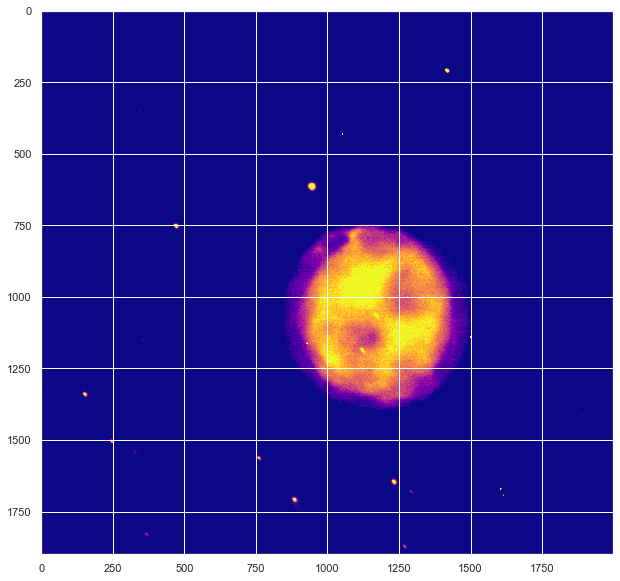

In [11]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/Ha')
im = fits.getdata('master_owl_ha.fits')
plt.imshow(im, vmin =0.6, vmax = 1.1,cmap = 'plasma')

In [12]:
# os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/Ha')
# lis = glob('UCD*')
# i=0
# while i < len(lis):
#     os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/Ha')
#     im_n = CCDData(fits.getdata(lis[i]), unit=u.adu)

#     im_trim = ccdproc.trim_image(im_n[1100:3000,900:2900])
    
#     b_n = CCDData(masterbias_l, unit=u.adu)
#     b_trim = ccdproc.trim_image(b_n[1100:3000,900:2900])
#     tot = (np.array(im_trim)-np.array(b_trim))/nmasterflatha
#     av = np.median(tot[1000:1300,1000:1300])
#     im = tot/av

#     name = 'M97_crop_0{}'.format(i+1)
    
#     os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/trim')
#     hdu = fits.PrimaryHDU(im)
#     hdul = fits.HDUList([hdu])
#     hdul.writeto(name+'.fits', overwrite = True)
#     i += 1
        

In [13]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/trim')

#finding the brightest star
def starfind(source):
    im = fits.getdata(source)
    master_std = mad_std(im)
    masterdaofind = DAOStarFinder(fwhm=10., threshold= 10*master_std)
    mastersources = masterdaofind(im)
    mags = mastersources['mag']
    
    #finds index of the brightest star (min magnitude)
    ind = np.where(mags== np.min(mags))[0]
    return mastersources['xcentroid'][ind], mastersources['ycentroid'][ind]
    
    

def source_align(source,targetnames):
    targets = glob(targetnames)
    xs,ys = starfind(source)
    i = 0
    while i < len(targets):
        os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/trim')
        dat = fits.getdata(targets[i])
    
        x,y = starfind(targets[i])

        dx = int(x-xs)
        dy = int(y-ys)
        
        xrolled = np.roll(dat, -dx, axis=1)
        dat_new = np.roll(xrolled, -dy, axis=0)
        os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/align')
        name = 'M97_al_0{}'.format(i+1)
        
        im = dat_new
        hdu = fits.PrimaryHDU(im)
        hdul = fits.HDUList([hdu])
        hdul.writeto(name+'.fits', overwrite = True)
        i += 1

        
    return    



In [14]:

# os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/trim')

# source_align('M97_crop_01.fits','M97_crop*')


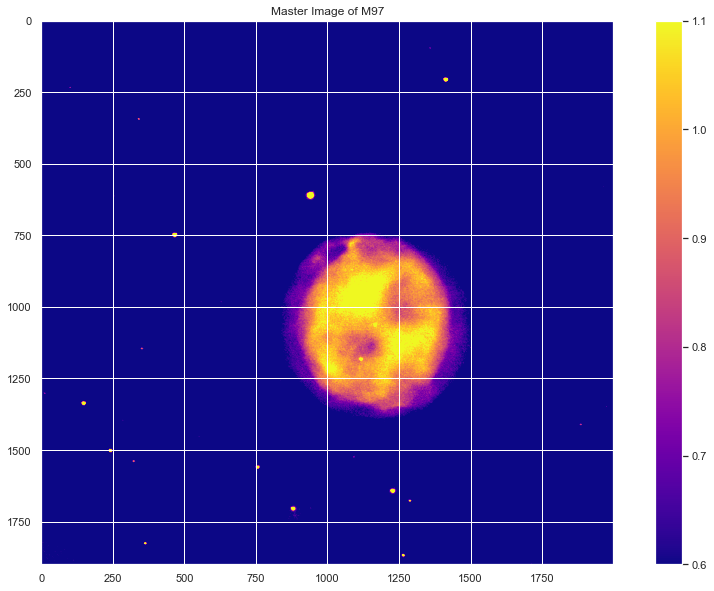

In [16]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/align')
# images = master('M97_al*')
# hdun = fits.PrimaryHDU(images)
# hdun1 = fits.HDUList([hdun])
# hdun1.writeto('master_owl_ha_al.fits', overwrite = True)

images = fits.getdata('master_owl_ha_al.fits')
plt.imshow(images, vmin =0.6, vmax = 1.1,cmap = 'plasma')
plt.colorbar()
plt.title('Master Image of M97')
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/images')
plt.savefig('Owl_master_ha.png')
plt.show()



In [20]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

Text(0.95, 0.05, '\nx : 1163.4\ny : 1062.4\nwidth_x : 1155.1\nwidth_y : 1302.6')

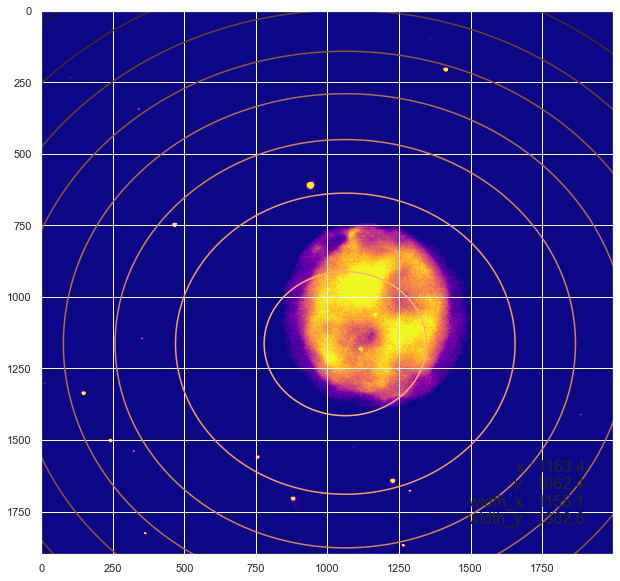

In [22]:
plt.imshow(images, vmin =0.6, vmax = 1.1,cmap = 'plasma')
data = images
params = fitgaussian(data)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

In [23]:
print(params)

[6.65596539e-01 1.16339229e+03 1.06237284e+03 1.15509518e+03
 1.30260672e+03]


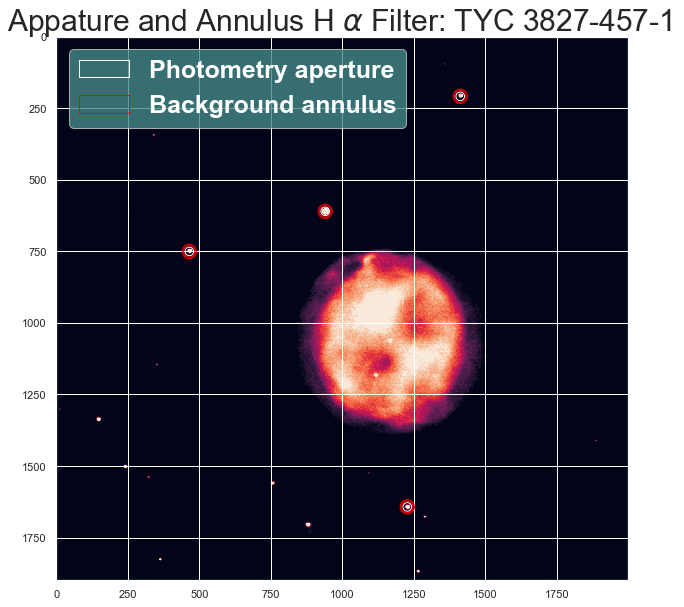

In [52]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/align')
image = fits.getdata('master_owl_ha_al.fits')

# Set up aperture and annulus
positions = [(940,610),(1227,1643),(465,750),(1412,208)]

aperture = CircularAperture(positions,r =15)
annulus = CircularAnnulus(positions, r_in= 20., r_out=25)

# Make a list of apertures
apers = [aperture, annulus]

# And run aperture photometry
phot_table = aperture_photometry(image, apers)


# We calculate the mean counts in each pixel in the background annulus, and then multiply by the area
# in the aperture to get the total background counts within each aperture

bkg_mean = (phot_table['aperture_sum_1'])/(annulus.area)

bkg_total = bkg_mean * aperture.area


bkg_mean = phot_table['aperture_sum_1'] / annulus.area
bkg_total = bkg_mean * aperture.area
net_star = phot_table['aperture_sum_0'] - bkg_total   
    
# Now we get the final table of background subtracted counts within each aperture
final_sum = phot_table['aperture_sum_0'] - bkg_total
       
magnitudes = -2.5*np.log10(final_sum)

#mag in r
A= -magnitudes[0] +11.828
B  = -magnitudes[1] + 13.845
C = -magnitudes[2] + 15.478
D = -magnitudes[3] +15.536


zerom = np.mean([A,B,C,D])
real_m = magnitudes + zerom

plt.imshow(image,vmin =0.6, vmax = 1.1)
ap_patches = aperture.plot(color='white', lw=1,
                           label='Photometry aperture')
ann_patches = annulus.plot(color='red', lw=1,
                                    label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.title('Appature and Annulus H $\\alpha$ Filter: TYC 3827-457-1 ', fontsize = 30)
plt.legend(loc= 'upper left', facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 25})

plt.show()

In [53]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/align2')
images = glob('M97_al*')
z = []
mags = []
for file in images:

    image = fits.getdata(file)
    # Set up aperture and annulus
    positions = [(940,610),(1227,1643),(465,750),(1412,208),(1115,1185)]

    aperture = CircularAperture(positions,r =15)
    annulus = CircularAnnulus(positions, r_in= 20., r_out=25)

    # Make a list of apertures
    apers = [aperture, annulus]

    # And run aperture photometry
    phot_table = aperture_photometry(image, apers)


    # We calculate the mean counts in each pixel in the background annulus, and then multiply by the area
    # in the aperture to get the total background counts within each aperture

    bkg_mean = (phot_table['aperture_sum_1'])/(annulus.area)

    bkg_total = bkg_mean * aperture.area


    bkg_mean = phot_table['aperture_sum_1'] / annulus.area
    bkg_total = bkg_mean * aperture.area
    net_star = phot_table['aperture_sum_0'] - bkg_total   
    
    # Now we get the final table of background subtracted counts within each aperture
    final_sum = phot_table['aperture_sum_0'] - bkg_total

    magnitudes = -2.5*np.log10(final_sum)
   
    #mag r= 11.828
    A= -magnitudes[0] +11.828
    B  = -magnitudes[1] + 13.845
    C = -magnitudes[2] + 15.478
    D = -magnitudes[3] +15.536

    zerom = np.mean([A,B,C,D])
    real_m = magnitudes + zerom

    
    real_m = magnitudes + zerom
    z.append(zerom)
    mags.append(real_m)


[21.82866252705069, 21.610725262255112, 21.471313064962928, 21.37513815153817, 21.366937696317915, 21.669531765522848, 21.39559383703643, 21.278822857907144, 21.370257207630914, 21.579341411214106, 21.538054685752865, 21.757543418279624, 21.77357933805549, 21.84328755193208, 21.984735228509816, 21.776275668466372, 21.323781472585495]
  aperture_sum_0 
-----------------
8.851939428840776
  aperture_sum_0 
-----------------
216.5211002333189


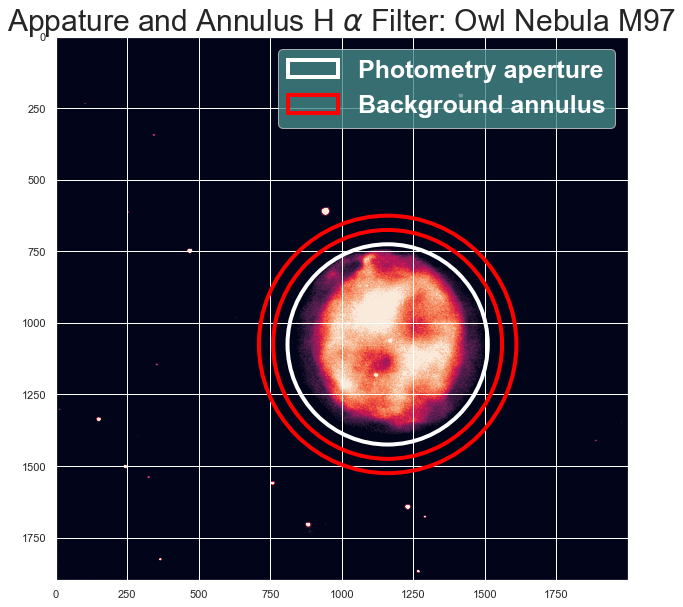

In [54]:
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/obs/M97/align')
image = fits.getdata('master_owl_ha_al.fits')

print(z)
# Set up aperture and annulus
positions = [(1160,1075)]

aperture = CircularAperture(positions,r =350)
annulus = CircularAnnulus(positions, r_in= 400., r_out=450)
 
# Make a list of apertures
apers = [aperture, annulus]

# And run aperture photometry
phot_table = aperture_photometry(image, apers)


 # We calculate the mean counts in each pixel in the background annulus, and then multiply by the area
    # in the aperture to get the total background counts within each aperture

bkg_mean = (phot_table['aperture_sum_1'])/(annulus.area)

bkg_total = bkg_mean * aperture.area


bkg_mean = phot_table['aperture_sum_1'] / annulus.area
bkg_total = bkg_mean * aperture.area
net_star = phot_table['aperture_sum_0'] - bkg_total   
    # Now we get the final table of background subtracted counts within each aperture
final_sum = phot_table['aperture_sum_0'] - bkg_total
       
magnitudes = -2.5*np.log10(final_sum)
print(magnitudes+np.mean(z))
net_star = phot_table['aperture_sum_0'] - bkg_total       
        
snr = net_star / np.sqrt(net_star + bkg_total)

# print(bkg_total)
# print('mean=',bkg_mean[0])
print(snr)

plt.imshow(image,vmin =0.6, vmax = 1.1)
ap_patches = aperture.plot(color='white', lw=4,
                           label='Photometry aperture')
ann_patches = annulus.plot(color='red', lw=4,
                                    label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.title('Appature and Annulus H $\\alpha$ Filter: Owl Nebula M97', fontsize = 30)
plt.legend(loc= 'upper right', facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 25})


In [139]:
t = fits.getdata('M97_crop_01.fits')
print(t)
plt.imshow(t,vmin = 0.7,vmax = 1.1,cmap = 'magma')
plt.contour(t,levels=[10,30,80], colors='white', alpha=0.5)

FileNotFoundError: [Errno 2] No such file or directory: 'M97_crop_01.fits'